<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/NAND_gate_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np

In [20]:
class LogisticReg:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size

        # Initialize weights
        self.weights = np.random.randn(self.input_size, self.output_size,)
        #print ('shape of weights ', np.shape(self.weights))

        # Initialize the biases
        self.bias = np.zeros((1, self.output_size))
        #print ('bias shape ', np.shape(self.bias))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        #print ('shape of X', np.shape(X))
        self.activation = np.dot(X, self.weights) + self.bias
        #print ('activation shape ' , np.shape(self.activation))
        self.predicted_output = self.sigmoid(self.activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Compute the output layer error (simple mean-square loss)
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Update weights and biases
        self.weights += np.dot(X.T, output_delta) * learning_rate
        self.bias += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print('Epoch ', {epoch}, 'Loss ', {loss})

In [21]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1], [1], [1], [0]])

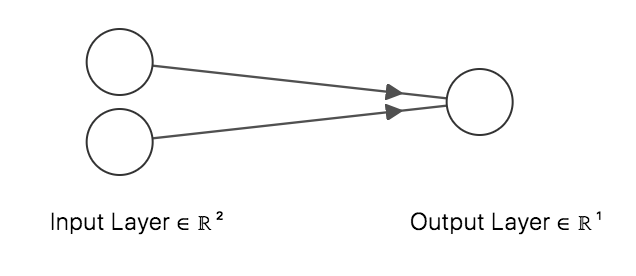

In [22]:
nn = LogisticReg(input_size=2, output_size=1)
nn.train(X, y, epochs=20000, learning_rate=0.1)

Epoch  {0} Loss  {0.2954838583763344}
Epoch  {1000} Loss  {0.037328472564785706}
Epoch  {2000} Loss  {0.01712116676779198}
Epoch  {3000} Loss  {0.01067677523159516}
Epoch  {4000} Loss  {0.007639291854785956}
Epoch  {5000} Loss  {0.005902750086541809}
Epoch  {6000} Loss  {0.004788889680960077}
Epoch  {7000} Loss  {0.004017819817791941}
Epoch  {8000} Loss  {0.0034543338687722217}
Epoch  {9000} Loss  {0.0030255584635815905}
Epoch  {10000} Loss  {0.002688914374103764}
Epoch  {11000} Loss  {0.0024179307102993415}
Epoch  {12000} Loss  {0.0021953211241353124}
Epoch  {13000} Loss  {0.0020093366636326875}
Epoch  {14000} Loss  {0.0018517229503842714}
Epoch  {15000} Loss  {0.0017165166231575008}
Epoch  {16000} Loss  {0.001599305546089563}
Epoch  {17000} Loss  {0.0014967573832548211}
Epoch  {18000} Loss  {0.0014063097093364703}
Epoch  {19000} Loss  {0.0013259607214554819}


In [23]:
# Test the trained model
output = nn.feedforward(X)
print('Predictions after training: ')
print(output)

Predictions after training: 
[[0.9999241 ]
 [0.96165078]
 [0.96165078]
 [0.04555401]]
